## Understanding Histograms and Kernel Density Estimation

### Reza Bagheri

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import norm, uniform
import pandas as pd
import seaborn as sns

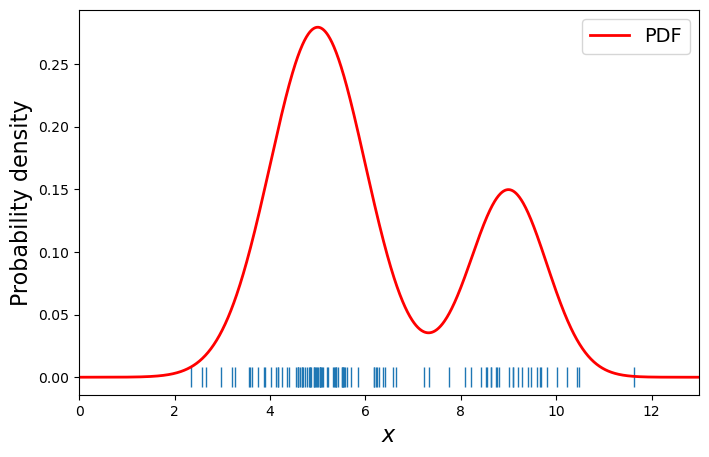

In [2]:
np.random.seed(2)
sample_size = 100
mu1 = 5
sigma1 = 1
mu2 = 9
sigma2 = 0.8
dist1 = norm.rvs(loc = mu1, scale = sigma1, size=sample_size)
dist2 = norm.rvs(loc = mu2, scale = sigma2, size=sample_size)

x = np.arange(0, 13, 0.01)
pdf1 = norm.pdf(x, loc = mu1, scale = sigma1)
pdf2 = norm.pdf(x, loc = mu2, scale = sigma2)
mix_coeffs = [0.7, 0.3]
pdf = mix_coeffs[0]*pdf1+mix_coeffs[1]*pdf2

data = np.zeros((sample_size, 2))
data[:, 0] = dist1
data[:, 1] = dist2

random_idx = np.random.choice(np.arange(2), size=(sample_size,), p=mix_coeffs)
sample = data[np.arange(sample_size), random_idx]

plt.figure(figsize=(8, 5))
num_bins = 40
plt.plot(sample, np.zeros(len(sample)), marker='|', markersize=15, linestyle='None', alpha=1)
plt.plot(x, pdf, color='red', linewidth=2, label="PDF")
plt.xlim([0, 13])
plt.xlabel('$x$', fontsize=16)
plt.ylabel('Probability density', fontsize=16)
plt.legend(loc='best', fontsize=14)
plt.show()

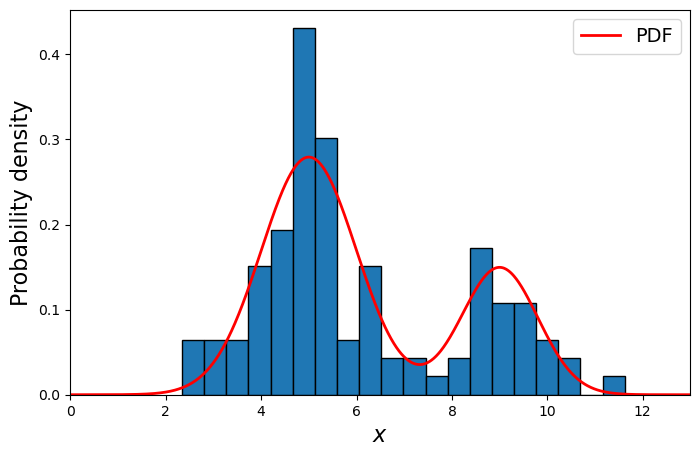

In [3]:
plt.figure(figsize=(8, 5))
num_bins = 20
plt.hist(sample, density=True, bins = num_bins, edgecolor='black', linewidth=1)
plt.plot(x, pdf, color='red', linewidth=2, label="PDF")
plt.xlim([0, 13])
plt.xlabel('$x$', fontsize=16)
plt.ylabel('Probability density', fontsize=16)
plt.legend(loc='best', fontsize=14)

plt.show()

[]

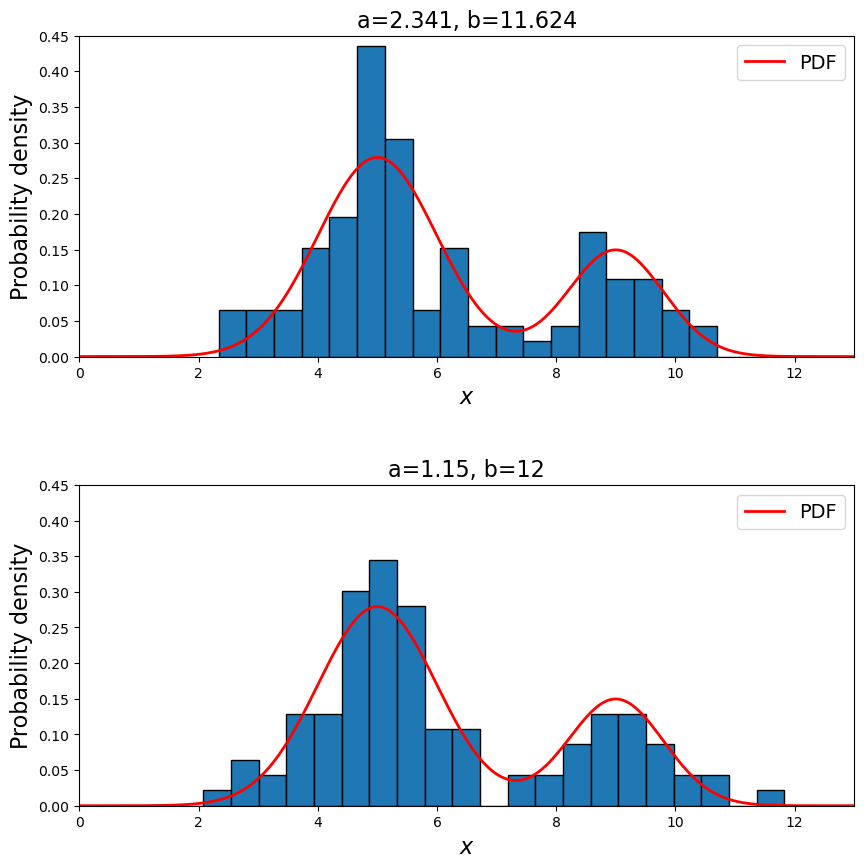

In [4]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,10))
plt.subplots_adjust(hspace=0.4)
num_bins = 20
bin_width = (max(sample) - min(sample)) / num_bins
ax1.hist(sample, density=True, bins = np.arange(min(sample), max(sample) + bin_width, bin_width),
         edgecolor='black', linewidth=1)
ax1.plot(x, pdf, color='red', linewidth=2, label="PDF")
ax1.set_xlim([0, 13])
ax1.set_ylim([0, 0.45])
ax1.set_xlabel('$x$', fontsize=16)
ax1.set_ylabel('Probability density', fontsize=16)
ax1.legend(loc='best', fontsize=14)
ax1.set_title('a={}, b={}'.format(np.round(min(sample), 3),
                                  np.round(max(sample), 3)), fontsize=16)

ax2.hist(sample, density=True, bins = np.arange(1.15, 12 + bin_width, bin_width),
         edgecolor='black', linewidth=1)
ax2.plot(x, pdf, color='red', linewidth=2, label="PDF")
ax2.set_xlim([0, 13])
ax2.set_ylim([0, 0.45])
ax2.set_xlabel('$x$', fontsize=16)
ax2.set_ylabel('Probability density', fontsize=16)
ax2.legend(loc='best', fontsize=14)
ax2.set_title('a={}, b={}'.format(1.15, 12), fontsize=16)
plt.plot()

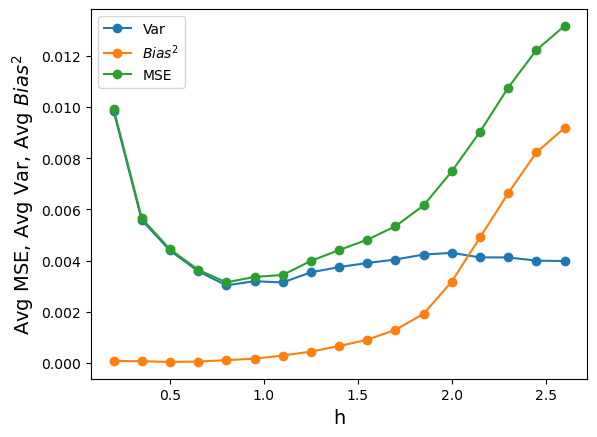

In [5]:
np.random.seed(0)
n_samples = 100
sample_size = 80
h_list = np.arange(0.2, 2.7, 0.15)
mu = 5
sigma = 1
samples = norm.rvs(loc = mu, scale = sigma,
                   size=n_samples*sample_size).reshape(n_samples, sample_size)

xt_list = np.arange(mu-3*sigma, mu+3*sigma, 0.05)
f_xt = norm.pdf(xt_list, loc = mu, scale = sigma)
avg_mse_list = []
avg_var_list = []
avg_bias_sq_list =[]
for h in h_list:
    fhat_xt_list = []
    for i in range(n_samples):
        (ni, bins) = np.histogram(samples[i], density=True,
                                  bins = np.arange(min(samples[i]), max(samples[i]) + h, h))
        fhat_xt_ind = np.digitize(xt_list, bins)-1
        fhat_xt = np.pad(ni, [1,1], 'constant', constant_values=0).take(fhat_xt_ind+1, mode='clip') 
        fhat_xt_list.append(fhat_xt)
    avg_bias_sq_list.append(((np.vstack(fhat_xt_list).mean(axis=0)-f_xt)**2).mean())
    avg_var_list.append(np.vstack(fhat_xt_list).var(axis=0).mean())
    avg_mse_list.append(np.mean((np.vstack(fhat_xt_list)-f_xt)**2).mean())
    
plt.plot(h_list, avg_var_list, "-o", label="Var")
plt.plot(h_list, avg_bias_sq_list, "-o", label="$Bias^2$")
plt.plot(h_list, avg_mse_list, "-o", label="MSE")
plt.xlabel("h", fontsize=14)
plt.ylabel("Avg MSE, Avg Var, Avg $Bias^2$", fontsize=14)
plt.legend(loc="best")
plt.show()

[]

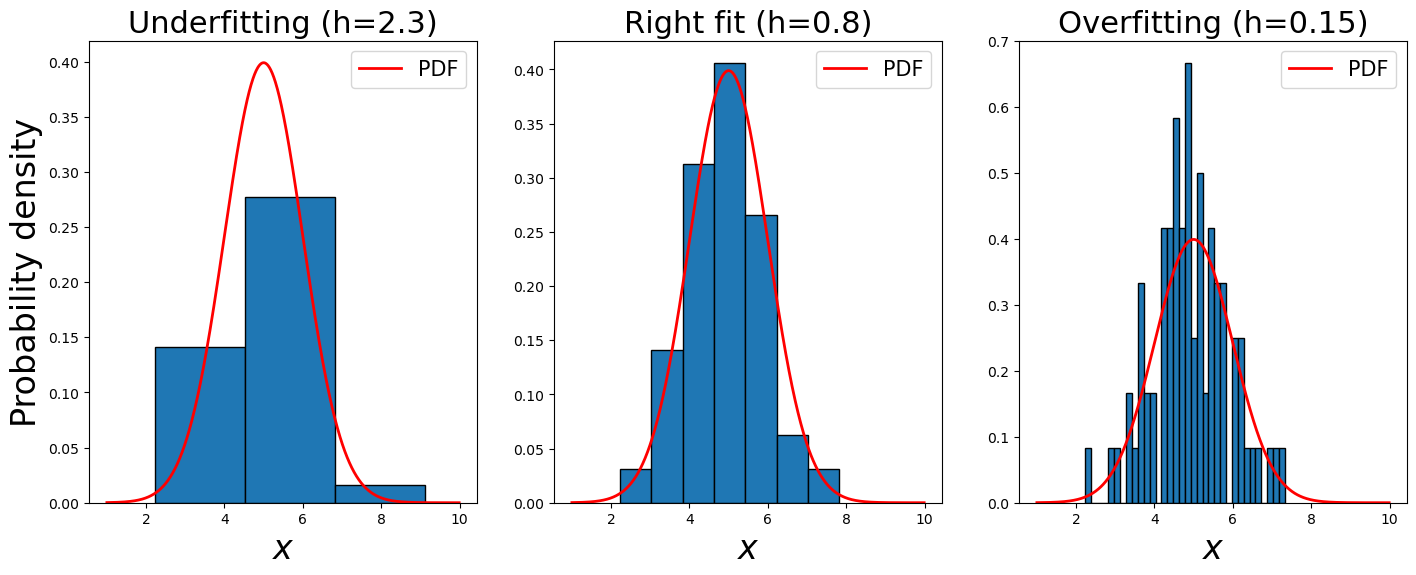

In [6]:
h_list = [2.3, 0.8, 0.15]
labels = ["Underfitting", "Right fit", "Overfitting"]
x = np.arange(1, 10, 0.01)
f_x = norm.pdf(x, loc = mu, scale = sigma)
fig, ax = plt.subplots(1, 3, figsize=(17,6))
for i in range(len(ax)):
    p = 3
    ax[i].hist(samples[p], density=True,
               bins = np.arange(min(samples[p]),
                                max(samples[p]) + h_list[i], h_list[i]),
               edgecolor='black', linewidth=1)  
    ax[i].plot(x, f_x, color='red', label="PDF", linewidth=2)
    ax[i].set_xlabel('$x$', fontsize=24)
    ax[i].set_title("{} (h={})".format(labels[i], h_list[i]), fontsize=22)
    ax[i].legend(loc='best', fontsize=15)
ax[0].set_ylabel('Probability density', fontsize=24)
plt.plot()

In [7]:
(3.5*samples.std(axis=1, ddof=1)*samples.shape[1]**(-1/3)).mean()

0.8005394814153546

In [8]:
def kde(x, data, h, dist=norm(0, 1)):
    n = len(data)
    K = dist.pdf((x.repeat(n).reshape(len(x), n) - data) / h)
    return np.sum(K, axis=1) / n / h

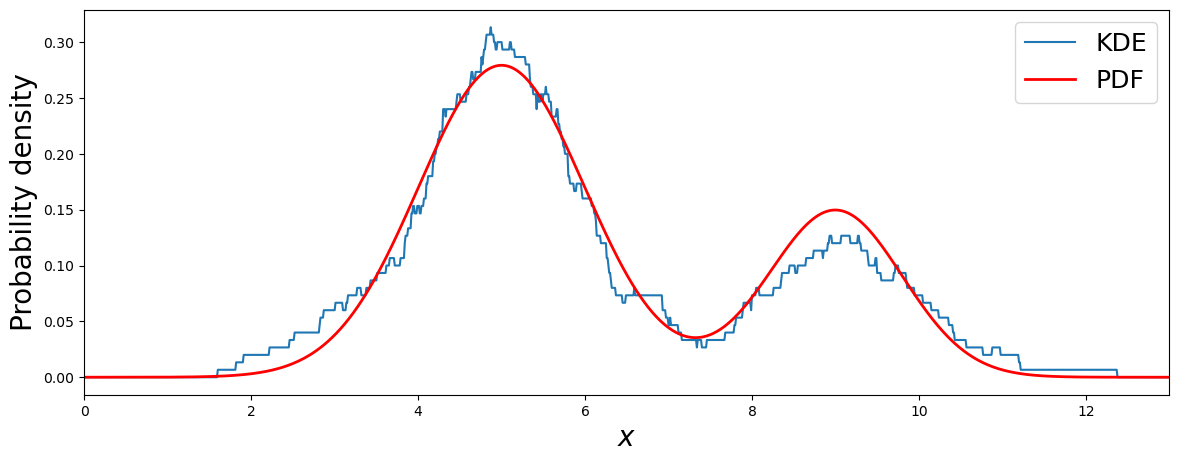

In [9]:
h = 0.75
x = np.arange(0, 13, 0.01)
fhat = kde(x, sample, h, dist=uniform(loc=-1, scale=2))
    
plt.figure(figsize=(14, 5))
plt.plot(x, fhat, label='KDE')
plt.plot(x, pdf, color='red', linewidth=2, label="PDF")
plt.xlim([0, 13])
plt.xlabel('$x$', fontsize=20)
plt.ylabel('Probability density', fontsize=20)
plt.legend(loc='best', fontsize=18)
plt.show()

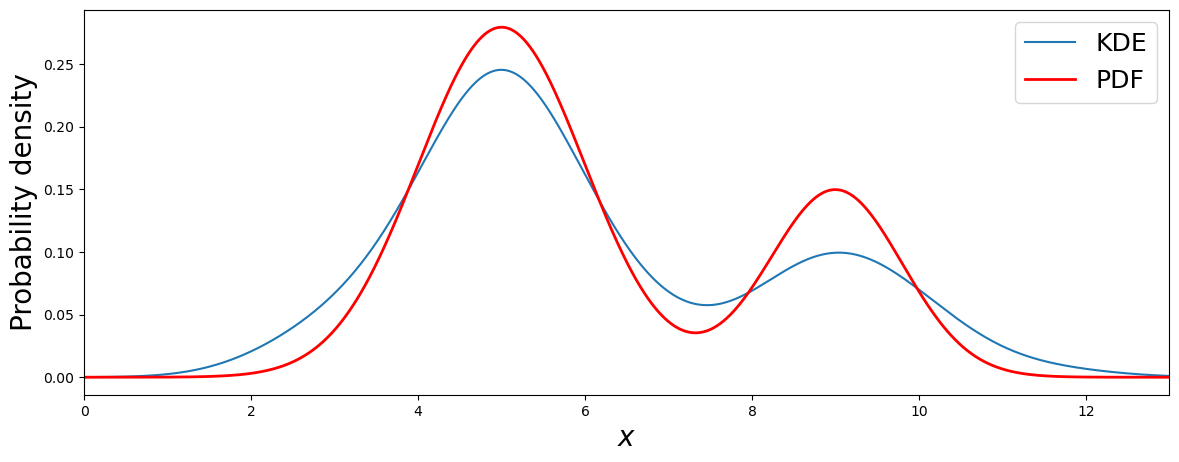

In [10]:
h=0.75
x = np.arange(0, 13, 0.01)
fhat = kde(x, sample, h)  

plt.figure(figsize=(14, 5))
plt.plot(x, fhat, label='KDE')
plt.plot(x, pdf, color='red', linewidth=2, label="PDF")
plt.xlim([0, 13])
plt.xlabel('$x$', fontsize=20)
plt.ylabel('Probability density', fontsize=20)
plt.legend(loc='best', fontsize=18)
plt.show()

In [11]:
def plot_kernel(x, data, h):
    n = len(data)
    K = norm(0,1).pdf((x.repeat(n).reshape(len(x), n) - data) / h) / h 
    for i in range(K.shape[1]-1):
        plt.plot(x, K[:,i], color="grey", alpha=0.3)
    plt.plot(x, K[:,i+1], color="grey", alpha=0.3, label="$K_h(x-X_i)$")

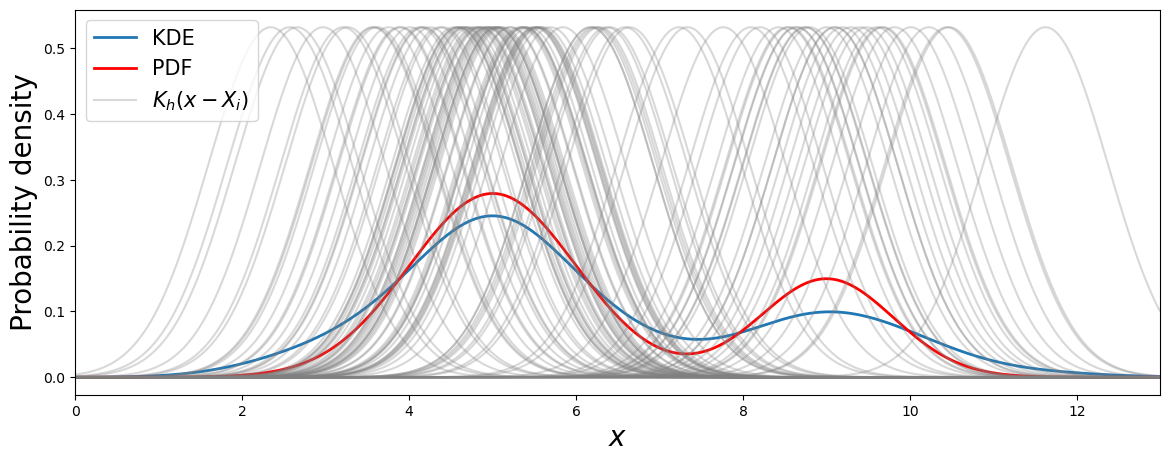

In [12]:
h=0.75
x = np.arange(0, 13, 0.01)
fhat = kde(x, sample, h)  

plt.figure(figsize=(14, 5))
plt.plot(x, fhat, label='KDE', linewidth=2)
plt.plot(x, pdf, color='red', linewidth=2, label="PDF")
plot_kernel(x, sample, h)
plt.xlim([0, 13])
plt.xlabel('$x$', fontsize=20)
plt.ylabel('Probability density', fontsize=20)
plt.legend(loc='best', fontsize=15)
plt.show()

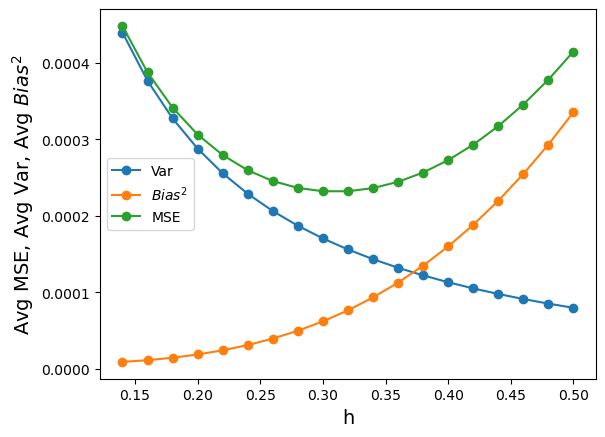

In [13]:
np.random.seed(5)
n_samples = 100
sample_size = 500
h_list = np.arange(0.14, 0.52, 0.02)
mu = 5
sigma = 1
samples = norm.rvs(loc = mu, scale = sigma,
                   size=n_samples*sample_size).reshape(n_samples, sample_size)

xt_list = np.arange(mu-4*sigma, mu+4*sigma, 0.02)
f_xt = norm.pdf(xt_list, loc = mu, scale = sigma)
avg_mse_list = []
avg_var_list = []
avg_bias_sq_list =[]
for h in h_list:
    fhat_xt_list = []
    for i in range(n_samples):
        fhat_xt = fhat = kde(xt_list, samples[i], h)  
        fhat_xt_list.append(fhat_xt)
    avg_bias_sq_list.append(((np.vstack(fhat_xt_list).mean(axis=0)-f_xt)**2).mean())
    avg_var_list.append(np.vstack(fhat_xt_list).var(axis=0).mean())
    avg_mse_list.append(np.mean((np.vstack(fhat_xt_list)-f_xt)**2).mean())
    
plt.plot(h_list, avg_var_list, "-o", label="Var")
plt.plot(h_list, avg_bias_sq_list, "-o", label="$Bias^2$")
plt.plot(h_list, avg_mse_list, "-o", label="MSE")
plt.xlabel("h", fontsize=14)
plt.ylabel("Avg MSE, Avg Var, Avg $Bias^2$", fontsize=14)
plt.legend(loc="best")
plt.show()

In [14]:
(1.06*samples.std(axis=1, ddof=1)*samples.shape[1]**(-1/5)).mean()

0.3063635211427913

[]

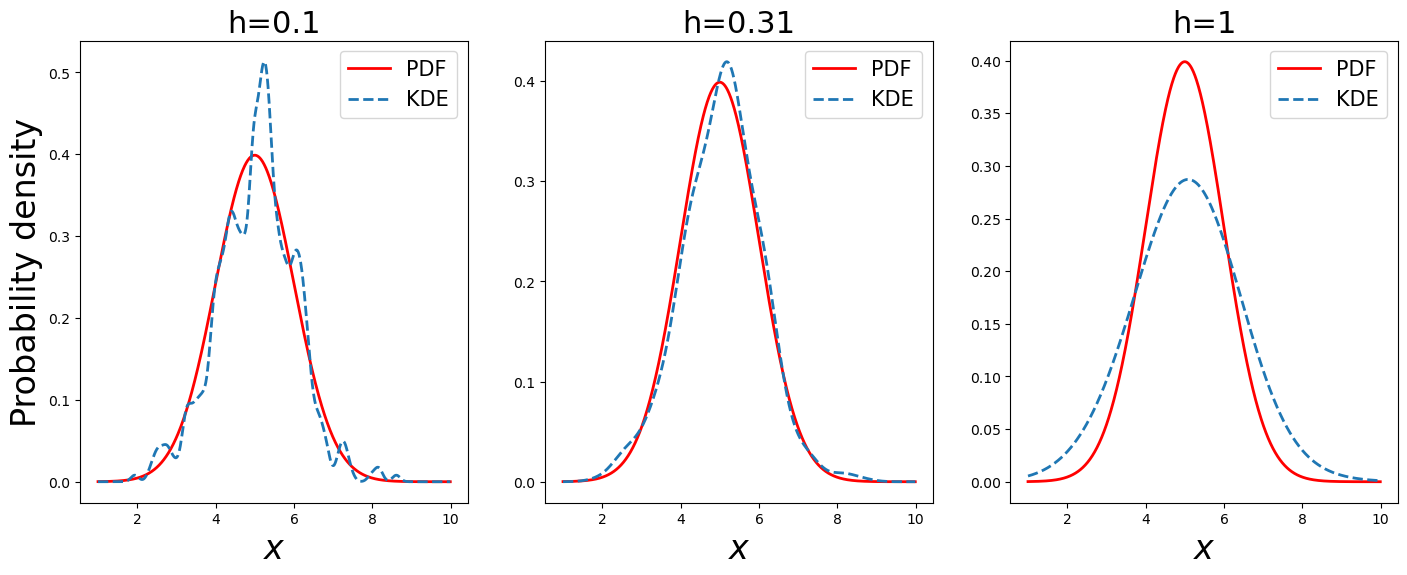

In [15]:
h_list = [0.1, 0.31, 1]
labels = ["Underfitting", "Right fit", "Overfitting"]
x = np.arange(1, 10, 0.01)
f_x = norm.pdf(x, loc = mu, scale = sigma)
fig, ax = plt.subplots(1, 3, figsize=(17,6))
for i in range(len(ax)):
    ax[i].plot(x, f_x, color='red', label="PDF", linewidth=2)
    fhat = kde(x, samples[1], h_list[i])  
    ax[i].plot(x, fhat, linewidth=2, linestyle="--", label="KDE")
    ax[i].set_xlabel('$x$', fontsize=24)
    ax[i].legend(loc='best', fontsize=15)
    ax[i].set_title('h={}'.format(h_list[i]), fontsize=22)
ax[0].set_ylabel('Probability density', fontsize=24)
plt.plot()

[]

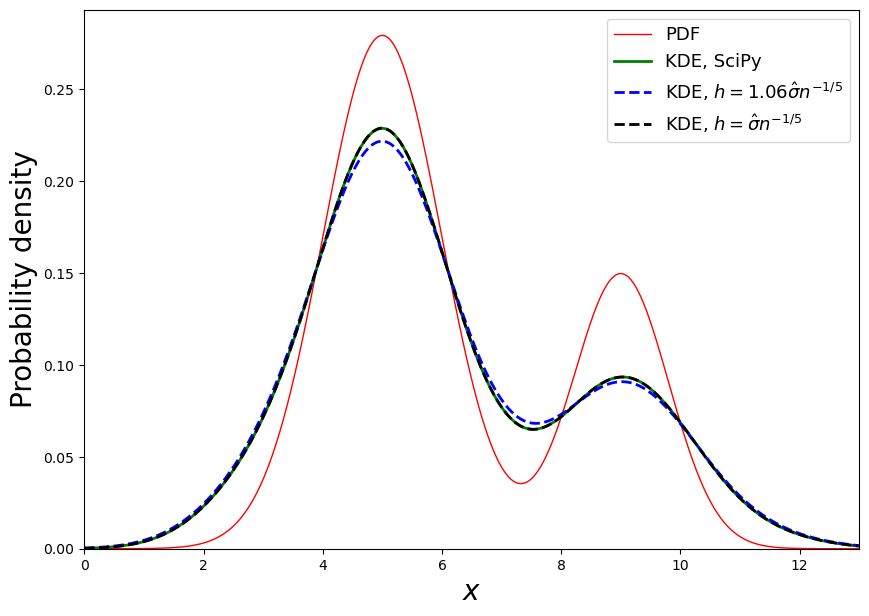

In [16]:
x = np.arange(0, 13, 0.01)
f_x = norm.pdf(x, loc = mu, scale = sigma)
h1 = 1.06 * sample.std(ddof=1) * len(sample)**(-1/5)
h2 = sample.std(ddof=1) * len(sample)**(-1/5)
plt.figure(figsize=(10, 7))
plt.plot(x, pdf, color='red', label="PDF", linewidth=1)
fhat1 = kde(x, sample, h1)  
fhat2 = kde(x, sample, h2)  
sns.kdeplot(data=sample, color="green", linewidth=2, label="KDE, SciPy")
plt.plot(x, fhat1, linewidth=2, linestyle="--", color= "blue", label="KDE, $h=1.06\hat{\sigma}n^{-1/5}$")
plt.plot(x, fhat2, linewidth=2, linestyle="--", color="black", label="KDE, $h=\hat{\sigma}n^{-1/5}$")

plt.xlim([0, 13])
plt.xlabel('$x$', fontsize=20)
plt.legend(loc='best', fontsize=13)
plt.ylabel('Probability density', fontsize=20)
plt.plot()